In [1]:
import pandas as pd 
import numpy as np 
pd.set_option('display.mpl_style', 'default')
import matplotlib.pylab as plt
%matplotlib inline

#####load drop off data

In [122]:
df_evening = pd.read_csv("eveningdropoffschange.csv")
df_evening.columns = ['intersection', '2011', '2012', '2013']

In [123]:
df_evening = pd.read_json("EveningDropoffs.json")
#df_evening = df_evening.transpose()

In [117]:
#df_evening = df_evening.transpose()

mean2010 = df_evening[2010.0].mean()
mean2011 = df_evening[2011.0].mean()
mean2012 = df_evening[2012.0].mean() 
mean2013 = df_evening[2013.0].mean() 

std2010 = df_evening[2010.0].std()
std2011 = df_evening[2011.0].std()
std2012 = df_evening[2012.0].std()
std2013 = df_evening[2013.0].std() 

In [119]:
df_evening[2010.0] = (df_evening[2010.0] - mean2010)/std2010
df_evening[2011.0] = (df_evening[2011.0] - mean2011)/std2011
df_evening[2012.0] = (df_evening[2012.0] - mean2012)/std2012
df_evening[2013.0] = (df_evening[2013.0] - mean2013)/std2013

In [120]:
df_evening.head()

,2010.0,2011.0,2012.0,2013.0
0,-0.220139,-0.223371,-0.232488,-0.233171
1,-0.148842,-0.146810,-0.139962,-0.129292
10,-0.216427,-0.221913,-0.229343,-0.231798
100,-0.219883,-0.223371,-0.233213,-0.233296
1000,-0.220267,-0.222763,-0.233334,-0.234170


In [121]:
df_evening.set_index('intersection', inplace = True)

KeyError: 'intersection'

In [6]:
df_re = pd.read_json("/scratch/share/akabd/scripts/RealEstateJoin/RealEstate01year.json")

In [59]:
df_re.head()

,2004count,2004price,2005count,2005price,2006count,2006price,2007count,2007price,2008count,2008price,...,2011count,2011price,2012count,2012price,2013count,2013price,2014count,2014price,2015count,2015price
0,20,6039630,18,6297500,16,7313000,323,2632010,8,1596050,...,7,1855000,5,0,3,0,9,5880500,3,2278000
1,41,12749817,60,18802126,28,12568629,29,10864821,22,5548320,...,16,201777686,30,0,30,0,18,10536248,8,5968000
10,20,3750000,32,23626940,12,4849010,20,7886900,14,4677000,...,5,1197000,12,1914720,5,1350750,10,11758010,10,30279300
100,7,1920000,12,2899237,5,1703015,6,1967250,7,1077090,...,4,864949,7,1441500,6,1761000,4,751804,6,1512000
1000,29,5480996,16,3126440,21,5173397,13,4176458,12,1912500,...,6,1234449,10,1030000,9,2826750,16,3910550,7,1888500


In [7]:
even = [i for i in xrange(0, 24) if i % 2 == 0]
odd = [i for i in xrange(0, 24) if i % 2 != 0]

In [8]:
df_re = df_re.transpose()

In [14]:
df_count = df_re[even]

In [15]:
df_price = df_re[odd]

In [79]:
df091011= df_count.dropna().pct_change(axis=1).iloc[:,1:][['2009count', '2010count', '2011count']]

In [80]:
test = pd.merge(df_evening, df091011, right_index = True, left_index = True)

In [81]:
test.replace([np.inf, -np.inf], np.nan, inplace = True)

In [82]:
test.dropna(inplace = True)

In [83]:
test.describe(percentiles = [.05, .1, .25, .5, .75, .90, .95])

,2011,2012,2013,2009count,2010count,2011count
count,53132.000000,53132.000000,53132.000000,53132.000000,53132.000000,53132.000000
mean,0.628556,0.212708,0.003177,0.108741,0.372330,0.256094
std,22.826144,0.826521,1.063388,1.112632,2.646529,1.267965
min,-0.967890,-0.987101,-0.990654,-0.990099,-0.956522,-0.994413
5%,-0.500000,-0.500000,-0.583333,-0.750000,-0.714286,-0.750000
10%,-0.350000,-0.370370,-0.464286,-0.666667,-0.600000,-0.631579
25%,-0.114447,-0.133333,-0.270072,-0.480000,-0.361259,-0.400000
50%,0.094906,0.088235,-0.081081,-0.166667,0.000000,0.000000
75%,0.335373,0.382353,0.109894,0.300000,0.571429,0.500000
90%,0.769231,0.818182,0.428571,1.000000,1.500000,1.333333


In [22]:
date_columns = ['2010', '2011', '2012']
df_test = test[(test['2010'] < test['2011'].quantile(.95)) & (test['2010price'] < test['2010price'].quantile(.95))]

In [90]:
df_test = test[(test['2011'] > test['2011'].quantile(.95)) ] #& (test['2010'] < test['2010'].quantile(.99))]# & (test['2010price'] > test['2010price'].quantile(.95))]

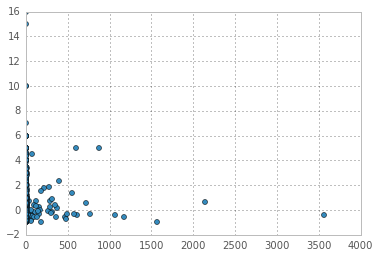

In [93]:
#df_test
plt.plot(df_test['2011'], df_test['2009count'], 'o', markersize = 5)


In [44]:
test.describe()

,2010,2011,2012,2010price,2011price,2012price
count,50345.000000,50345.000000,50345.000000,5.034500e+04,5.034500e+04,5.034500e+04
mean,0.643546,0.214804,0.004573,inf,inf,inf
std,23.443181,0.822334,1.083297,NaN,NaN,NaN
min,-0.967890,-0.987101,-0.990654,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,-0.113636,-0.130000,-0.268293,-4.945220e-01,-4.901107e-01,-1.000000e+00
50%,0.093991,0.090909,-0.079681,4.629094e-02,1.283033e-02,-1.000000e+00
75%,0.333333,0.383648,0.111111,1.166250e+00,1.193039e+00,-8.856211e-01
max,3562.500000,72.000000,142.600000,inf,inf,inf
